In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns

In [52]:
df = pd.read_csv('sales_data_sample.csv',encoding= 'unicode_escape')
pd.set_option('display.max_columns', None)

In [101]:
df.head(5)

,Ordernumber,Quantityordered,Priceeach,Orderlinenumber,Sales,Orderdate,Status,Qtr_id,Month_id,Year_id,Productline,Msrp,Productcode,Customername,Phone,Addressline1,Addressline2,City,State,Postalcode,Country,Territory,Contactlastname,Contactfirstname,Dealsize,Month,Day
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,,NYC,NY,10022,USA,,Yu,Kwai,Small,2,24
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,,Reims,,51100,France,EMEA,Henriot,Paul,Small,5,7
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,,Paris,,75508,France,EMEA,Da Cunha,Daniel,Medium,7,1
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,,Pasadena,CA,90003,USA,,Young,Julie,Medium,8,25
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,,San Francisco,CA,,USA,,Brown,Julie,Medium,10,10


In [100]:
df['Month'] = pd.DatetimeIndex(df['Orderdate']).month
df['Day'] = pd.DatetimeIndex(df['Orderdate']).day

In [78]:
df['Month_id'].value_counts()

11    597
10    317
5     252
1     229
2     224
3     212
8     191
12    180
4     178
9     171
7     141
6     131
Name: Month_id, dtype: int64

In [54]:
df.columns = map(str.capitalize, df.columns)

In [55]:
df.shape

(2823, 25)

In [56]:
df.describe()

,Ordernumber,Quantityordered,Priceeach,Orderlinenumber,Sales,Qtr_id,Month_id,Year_id,Msrp
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [57]:
df.columns

Index(['Ordernumber', 'Quantityordered', 'Priceeach', 'Orderlinenumber',
       'Sales', 'Orderdate', 'Status', 'Qtr_id', 'Month_id', 'Year_id',
       'Productline', 'Msrp', 'Productcode', 'Customername', 'Phone',
       'Addressline1', 'Addressline2', 'City', 'State', 'Postalcode',
       'Country', 'Territory', 'Contactlastname', 'Contactfirstname',
       'Dealsize'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ordernumber       2823 non-null   int64  
 1   Quantityordered   2823 non-null   int64  
 2   Priceeach         2823 non-null   float64
 3   Orderlinenumber   2823 non-null   int64  
 4   Sales             2823 non-null   float64
 5   Orderdate         2823 non-null   object 
 6   Status            2823 non-null   object 
 7   Qtr_id            2823 non-null   int64  
 8   Month_id          2823 non-null   int64  
 9   Year_id           2823 non-null   int64  
 10  Productline       2823 non-null   object 
 11  Msrp              2823 non-null   int64  
 12  Productcode       2823 non-null   object 
 13  Customername      2823 non-null   object 
 14  Phone             2823 non-null   object 
 15  Addressline1      2823 non-null   object 
 16  Addressline2      302 non-null    object 


In [59]:
df.isnull().sum()

Ordernumber            0
Quantityordered        0
Priceeach              0
Orderlinenumber        0
Sales                  0
Orderdate              0
Status                 0
Qtr_id                 0
Month_id               0
Year_id                0
Productline            0
Msrp                   0
Productcode            0
Customername           0
Phone                  0
Addressline1           0
Addressline2        2521
City                   0
State               1486
Postalcode            76
Country                0
Territory           1074
Contactlastname        0
Contactfirstname       0
Dealsize               0
dtype: int64

In [61]:
df.fillna('', inplace = True)

In [62]:
df.isnull().sum()

Ordernumber         0
Quantityordered     0
Priceeach           0
Orderlinenumber     0
Sales               0
Orderdate           0
Status              0
Qtr_id              0
Month_id            0
Year_id             0
Productline         0
Msrp                0
Productcode         0
Customername        0
Phone               0
Addressline1        0
Addressline2        0
City                0
State               0
Postalcode          0
Country             0
Territory           0
Contactlastname     0
Contactfirstname    0
Dealsize            0
dtype: int64

In [67]:
df.corr().drop(columns = ['Ordernumber', 'Orderlinenumber', 'Month_id','Year_id'])

<AxesSubplot:>

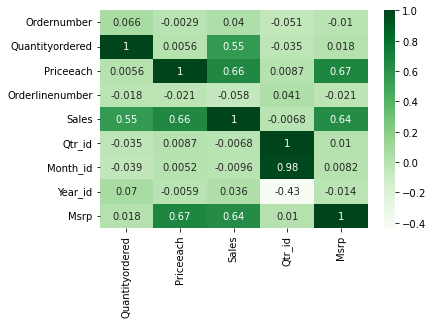

In [69]:
sns.heatmap(df.corr().drop(columns = ['Ordernumber', 'Orderlinenumber', 'Month_id','Year_id']), annot = True, cmap = 'Greens')

In [72]:
df['Orderdate'] = pd.to_datetime(df['Orderdate']).dt.date

In [ ]:
# import plotly.express as px
# fig = px.line(df, x = 'Year_id', y = ['Sales'], title = 'Total Sales ')
# fig.show()

<AxesSubplot:xlabel='Orderdate'>

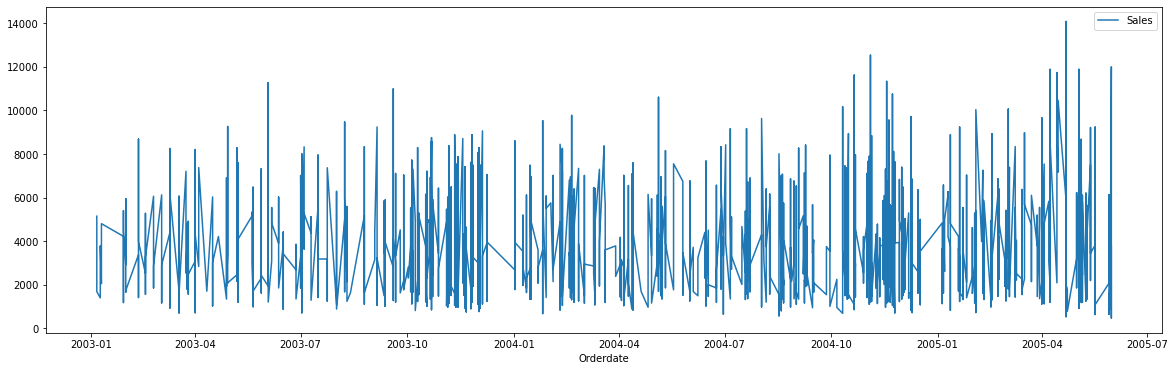

In [74]:
df.plot(kind = 'line', x = 'Orderdate', y = 'Sales', figsize = (20,6))

<AxesSubplot:xlabel='Month'>

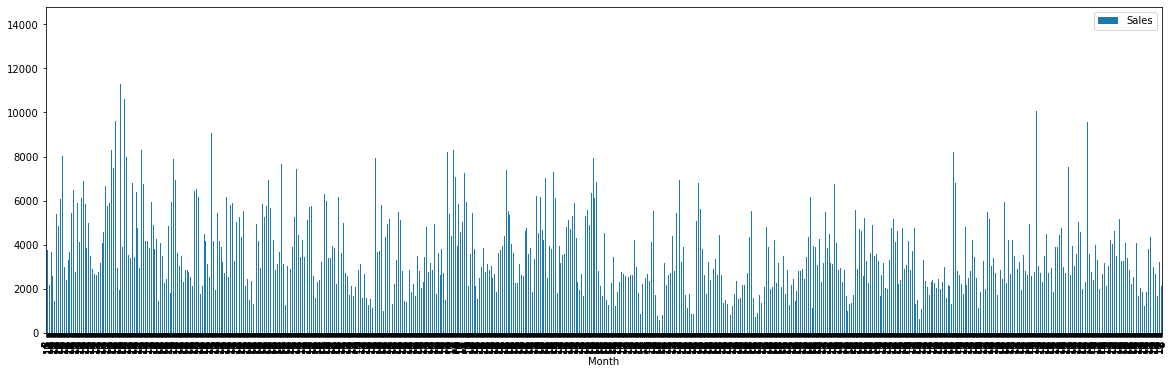

In [85]:
df.plot(kind = 'bar', x = 'Month', y = 'Sales', figsize = (20,6))

C:\swsetup\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Month', ylabel='count'>

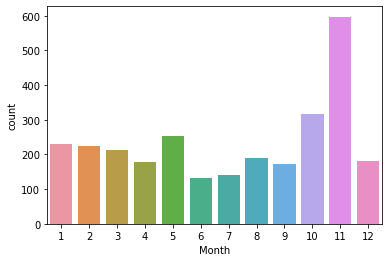

In [86]:
sns.countplot(df['Month'])

In [167]:
df.groupby(['Year_id']).mean()['Sales'].sort_values(ascending = False)

Year_id
2005    3747.880146
2003    3516.979540
2004    3512.388550
Name: Sales, dtype: float64

In [93]:
df.groupby(['Year_id']).sum()['Sales'].sort_values(ascending = False)

Year_id
2004    4724162.60
2003    3516979.54
2005    1791486.71
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Year_id', ylabel='Sales'>

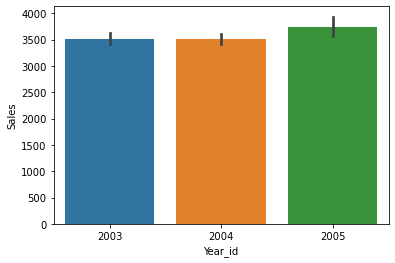

In [170]:
sns.barplot(data =df, x = 'Year_id', y = 'Sales')

In [94]:
df.groupby(['Year_id']).median()['Sales'].sort_values(ascending = False)

Year_id
2005    3316.815
2003    3210.095
2004    3141.570
Name: Sales, dtype: float64

In [95]:
df.groupby(['Productline']).sum()['Sales'].sort_values(ascending = False)

Productline
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Productline', ylabel='Sales'>

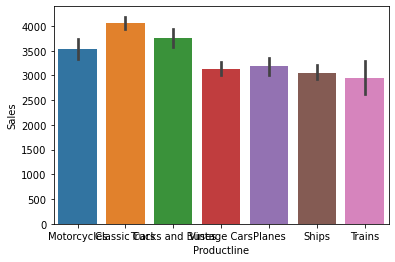

In [173]:
sns.barplot(data =df, x = 'Productline', y = 'Sales')

In [99]:
df.groupby(['Customername']).sum()['Sales'].sort_values(ascending = False)[:10]

Customername
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
Dragon Souveniers, Ltd.         172989.68
Land of Toys Inc.               164069.44
The Sharp Gifts Warehouse       160010.27
AV Stores, Co.                  157807.81
Anna's Decorations, Ltd         153996.13
Name: Sales, dtype: float64

<AxesSubplot:title={'center':'Sales by Customers'}, xlabel='Customername'>

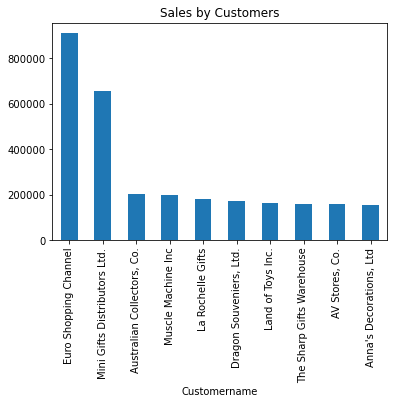

In [175]:
df.groupby(['Customername']).sum()['Sales'].sort_values(ascending = False)[:10].plot(kind = 'bar', title = 'Sales by Customers')

In [102]:
df.groupby(['Addressline1']).sum()['Sales'].sort_values(ascending = False)[:10]

Addressline1
C/ Moralzarzal, 86                      912294.11
5677 Strong St.                         654858.06
636 St Kilda Road                       200995.41
4092 Furth Circle                       197736.94
67, rue des Cinquante Otages            180124.90
Bronz Sok., Bronz Apt. 3/6 Tesvikiye    172989.68
897 Long Airport Avenue                 164069.44
3086 Ingle Ln.                          160010.27
Fauntleroy Circus                       157807.81
201 Miller Street                       153996.13
Name: Sales, dtype: float64

<AxesSubplot:title={'center':'Sales by Addressline1'}, xlabel='Addressline1'>

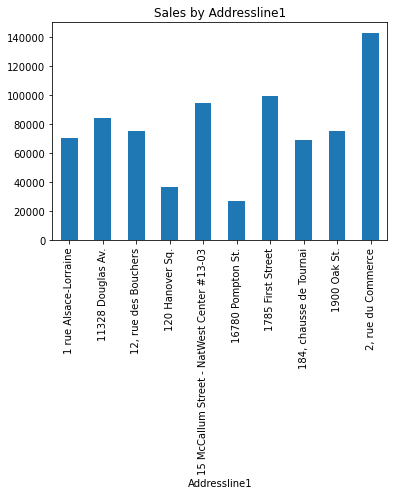

In [177]:
df.groupby(['Addressline1']).sum()['Sales'][:10].plot(kind = 'bar', title = 'Sales by Addressline1')

In [108]:
df.groupby(['State', 'City']).sum()['Sales'].sort_values(ascending = False)[:20]

State     City         
          Madrid           1082551.44
CA        San Rafael        654858.06
NY        NYC               560787.77
          Singapore         288488.41
          Paris             268944.68
CA        San Francisco     224358.68
MA        New Bedford       207874.86
          Nantes            204304.86
Victoria  Melbourne         200995.41
MA        Brickhaven        165255.20
CA        San Jose          160010.27
          Manchester        157807.81
MA        Boston            154069.66
NSW       North Sydney      153996.13
          Chatswood         151570.98
PA        Philadelphia      151189.13
          Salzburg          149798.63
          Kobenhavn         145041.60
          Lyon              142874.25
          Reggio Emilia     142601.33
Name: Sales, dtype: float64

<AxesSubplot:title={'center':'Sales by City'}, xlabel='City'>

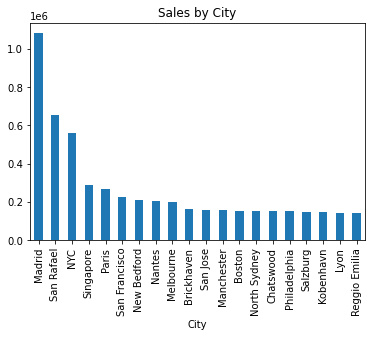

In [179]:
df.groupby(['City']).sum()['Sales'].sort_values(ascending = False)[:20].plot(kind = 'bar', title = 'Sales by City')

In [110]:
df.groupby(['Country', 'City']).sum()['Sales'].sort_values(ascending = False)[:20]

Country    City         
Spain      Madrid           1082551.44
USA        San Rafael        654858.06
           NYC               560787.77
Singapore  Singapore         288488.41
France     Paris             268944.68
USA        San Francisco     224358.68
           New Bedford       207874.86
France     Nantes            204304.86
Australia  Melbourne         200995.41
USA        Brickhaven        165255.20
           San Jose          160010.27
UK         Manchester        157807.81
USA        Boston            154069.66
Australia  North Sydney      153996.13
           Chatswood         151570.98
USA        Philadelphia      151189.13
Austria    Salzburg          149798.63
Denmark    Kobenhavn         145041.60
France     Lyon              142874.25
Italy      Reggio Emilia     142601.33
Name: Sales, dtype: float64

<AxesSubplot:title={'center':'Sales by Country'}, xlabel='Country'>

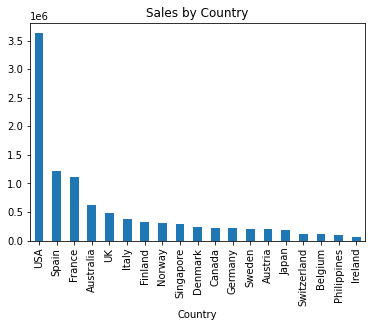

In [184]:
df.groupby(['Country']).sum()['Sales'].sort_values(ascending = False)[:20].plot(kind = 'bar', title = 'Sales by Country')

In [ ]:
df.groupby(['Country']).sum()['Sales'].sort_values(ascending = False)[:20]

In [111]:
df['Status'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: Status, dtype: int64

In [112]:
df['Dealsize'].value_counts()

Medium    1384
Small     1282
Large      157
Name: Dealsize, dtype: int64

In [152]:
Total_Cancelled = df[df['Status'] == 'Cancelled'].count()['Year_id']
print(f"In the Sales years, we had a total of {Total_Cancelled} cancelled transactions\n")
cancelled_2003 = df[(df['Status']=='Cancelled') &(df['Year_id'] == 2003)].count()['Year_id']
print(f"In 2003, we had a total of {cancelled_2003} cancelled transactions\n")
cancelled_2004 = df[(df['Status']=='Cancelled') &(df['Year_id'] == 2004)].count()['Year_id']
print(f"In 2004, we had  a total of {cancelled_2004} cancelled transactions\n")
cancelled_2005 = df[(df['Status']=='Cancelled') &(df['Year_id'] == 2005)].count()['Year_id']
print(f"In 2005, we had {cancelled_2005} cancelled transactions")

In the Sales years, we had a total of 60 cancelled transactions

In 2003, we had a total of 16 cancelled transactions

In 2004, we had  a total of 44 cancelled transactions

In 2005, we had 0 cancelled transactions


In [153]:
# cancelled_2003 = df[(df['Status']=='Cancelled') &(df['Year_id'] == 2003)].count()['Year_id']
# print(f"In 2003, we had a total of {cancelled_2003} cancelled transactions")

In [154]:
# cancelled_2004 = df[(df['Status']=='Cancelled') &(df['Year_id'] == 2004)].count()['Year_id']
# print(f"In 2004, we had  a total of {cancelled_2004} cancelled transactions")

In [155]:
# cancelled_2005 = df[(df['Status']=='Cancelled') &(df['Year_id'] == 2005)].count()['Year_id']
# print(f"In 2005, we had {cancelled_2005} cancelled transactions")

In [157]:
Total_disputed = df[df['Status'] == 'Disputed'].count()['Year_id']
print(f"In the Sales years, we had a total of {Total_disputed} disputed transactions\n")
Disputed_2003 = df[(df['Status']=='dis') &(df['Year_id'] == 2003)].count()['Year_id']
print(f"In 2003, we had a total of {Disputed_2003} disputed transactions\n")
Disputed_2004 = df[(df['Status']=='Disputed') &(df['Year_id'] == 2004)].count()['Year_id']
print(f"In 2004, we had  a total of {Disputed_2004} disputed transactions\n")
Disputed_2005 = df[(df['Status']=='Disputed') &(df['Year_id'] == 2005)].count()['Year_id']
print(f"In 2005, we had {Disputed_2005} disputed transactions")

In the Sales years, we had a total of 14 disputed transactions

In 2003, we had a total of 0 disputed transactions

In 2004, we had  a total of 0 disputed transactions

In 2005, we had 14 disputed transactions


# Predictive Analysis

In [187]:
df.head(5)

,Ordernumber,Quantityordered,Priceeach,Orderlinenumber,Sales,Orderdate,Status,Qtr_id,Month_id,Year_id,Productline,Msrp,Productcode,Customername,Phone,Addressline1,Addressline2,City,State,Postalcode,Country,Territory,Contactlastname,Contactfirstname,Dealsize,Month,Day
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,,NYC,NY,10022,USA,,Yu,Kwai,Small,2,24
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,,Reims,,51100,France,EMEA,Henriot,Paul,Small,5,7
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,,Paris,,75508,France,EMEA,Da Cunha,Daniel,Medium,7,1
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,,Pasadena,CA,90003,USA,,Young,Julie,Medium,8,25
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,,San Francisco,CA,,USA,,Brown,Julie,Medium,10,10


In [189]:
x = df[['Quantityordered','Priceeach','Month','Day','Year_id']]
y = df['Sales']

In [191]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [194]:
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(x_train, y_train)

LinearRegression()

In [196]:
y_pred = multiple_reg.predict(x_test)

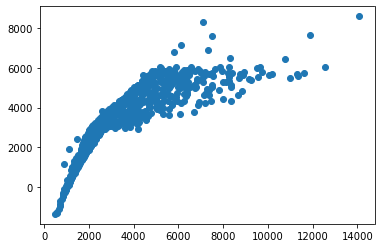

In [197]:
plt.scatter(y_test, y_pred)

In [198]:
multiple_reg.coef_

array([101.38393904,  59.30807288,  -3.62217461,  -4.72067584,
       -12.88523471])

In [199]:
multiple_reg.intercept_

20924.588828224347

In [200]:
# Testing the R2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6973290120409109

In [202]:
y_pred[:20]

array([1528.22184481, 2743.28882581, 4952.05785152, 4853.17218584,
       3488.12942102, 5823.8617196 , 4886.9783148 , 1694.44540725,
       2574.32206898, 6516.03901774, 2912.74224966, 3080.09017579,
       -941.14555466, 5035.06404972, 5575.67475844, 4267.30319419,
       1382.70775969, 5837.0208813 , 2412.03642889,  -79.23238619])

In [203]:
y_test

1091    1536.57
2328    2168.50
1474    4351.23
1437    3880.20
1105    3042.68
         ...   
1726     846.51
976     3006.43
489     5239.50
2657    4072.20
1159    4405.22
Name: Sales, Length: 932, dtype: float64

In [208]:
## Making the Predictions
Quantityordered = int(input("Quantityordered: "))
Priceeach = float(input("Priceeach: "))
Year_id = int(input("Year_id: "))
Month = int(input("Month: "))
Day = int(input("Day: "))


output = multiple_reg.predict([[Quantityordered,Priceeach,Month,Day,Year_id]])
print(output)

Quantityordered: 34
Priceeach: 81.35
Year_id: 2003
Month: 5
Day: 7
[3336.07376435]


In [204]:
x

,Quantityordered,Priceeach,Month,Day,Year_id
0,30,95.70,2,24,2003
1,34,81.35,5,7,2003
2,41,94.74,7,1,2003
3,45,83.26,8,25,2003
4,49,100.00,10,10,2003
...,...,...,...,...,...
2818,20,100.00,12,2,2004
2819,29,100.00,1,31,2005
2820,43,100.00,3,1,2005
2821,34,62.24,3,28,2005


In [209]:
from pandas import DataFrame

In [215]:
Sales_Prediction = {'Quantityordered': [20,16,10,50,44,90,45,90,34,27,16,74,38,16,22,12],
                   'Priceeach': [120,304,65,203,78,304,102,200,608,90,405,67,120,301,203, 100],
                   'Year_id': [2010,2011,2012,2013,2018,2019,2017,2018,2022,2021,2020,2013,2006,2004,2024,2004],
                   'Month': [1,2,3,4,5,9,5,6,9,2,12,11,8,4,3,2],
                   'Day': [1,2,3,4,15,12,16,17,22,30,28,18,14,8,9,10]}

In [217]:
ddf = DataFrame(Sales_Prediction, columns = ['Quantityordered', 'Priceeach', 'Year_id', 'Month', 'Day'])
ddf

,Quantityordered,Priceeach,Year_id,Month,Day
0,20,120,2010,1,1
1,16,304,2011,2,2
2,10,65,2012,3,3
3,50,203,2013,4,4
4,44,78,2018,5,15
5,90,304,2019,9,12
6,45,102,2017,5,16
7,90,200,2018,6,17
8,34,608,2022,9,22
9,27,90,2021,2,30


In [218]:
y_pred = multiple_reg.predict(ddf)
y_pred

array([22771.05946818, 33256.98103694, 18452.819899  , 30671.46343303,
       22485.08155799, 40568.51805108, 24000.59618608, 34353.83650007,
       52780.9527497 , 21283.26845196, 38832.27396562, 24825.34204143,
       24409.90628731, 33017.65928069, 27733.16372144, 20674.87175773])

In [222]:
ddf['Predicted_Sales'] = y_pred
ddf.round(0)

,Quantityordered,Priceeach,Year_id,Month,Day,Predicted_Sales
0,20,120,2010,1,1,22771.0
1,16,304,2011,2,2,33257.0
2,10,65,2012,3,3,18453.0
3,50,203,2013,4,4,30671.0
4,44,78,2018,5,15,22485.0
5,90,304,2019,9,12,40569.0
6,45,102,2017,5,16,24001.0
7,90,200,2018,6,17,34354.0
8,34,608,2022,9,22,52781.0
9,27,90,2021,2,30,21283.0


In [223]:
ddf.to_csv('Sales_Predicted_for_certain_years.csv')